In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [17]:
data_string = "C:/Users/maria/OneDrive/Documents/data/pied_piper/skagit/"

In [4]:
df = pd.read_csv("https://www.rmis.org/reports/CSV9481.txt")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)   

,record_code,format_version,submission_date,reporting_agency,release_agency,coordinator,tag_code_or_release_id,tag_type,first_sequential_number,last_sequential_number,related_group_type,related_group_id,species,run,brood_year,first_release_date,last_release_date,release_location_code,hatchery_location_code,stock_location_code,release_stage,rearing_type,study_type,release_strategy,avg_weight,avg_length,study_integrity,cwt_1st_mark,cwt_1st_mark_count,cwt_2nd_mark,cwt_2nd_mark_count,non_cwt_1st_mark,non_cwt_1st_mark_count,non_cwt_2nd_mark,non_cwt_2nd_mark_count,counting_method,tag_loss_rate,tag_loss_days,tag_loss_sample_size,tag_reused,comments,release_location_name,hatchery_location_name,stock_location_name,release_location_state,release_location_rmis_region,release_location_rmis_basin,record_origin,tagged_adclipped,tagged_unclipped,untagged_adclipped,untagged_unclipped,untagged_unknown
0,T,4.2,20231204,WDFW,WDFW,4,210677,0.0,NaN,NaN,NaN,NaN,1,2.0,2005,20060523,20060523,3F10208 030176 R,3F10208 031853AH,3F10208 030176 S,NaN,H,NaN,NaN,3.38,66.0,NaN,5000.0,200657.0,0.0,1641.0,5000.0,2872.0,NaN,NaN,NaN,0.0140,NaN,NaN,NaN,BO=W(WILD),SKAGIT R 03.0176,COUNTY LINE PONDS,SKAGIT R 03.0176,WA,SKAG,SKAGG,N,200657,1641,2872,0,0
1,N,4.2,20231204,WDFW,WDFW,4,!04P00111602,NaN,NaN,NaN,NaN,NaN,1,1.0,2016,20170602,20170602,3F10208 031411 R,3F10208 031421 H,3F10208 031421 S02,NaN,H,NaN,VO,6.21,84445.0,NaN,NaN,NaN,NaN,NaN,5000.0,105786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,MARBLEMOUNT HATCH,WA,SKAG,UPSK,N,0,0,105786,0,0
2,T,4.2,20231204,WDFW,WDFW,4,211007,0.0,NaN,NaN,NaN,NaN,1,2.0,2011,20120608,20120612,3F10208 031853BR,3F10208 031421 H,3F10208 030176 S,NaN,H,NaN,VO,4.27,69.0,NaN,5000.0,187388.0,0.0,1908.0,5000.0,1527.0,NaN,NaN,NaN,0.0080,NaN,500.0,NaN,BO=MIXED(HxW) FISH MOVED TO CO.LINE POND 6/5/1...,CO LINE PD2 03.1853B,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,187388,1908,1527,0,0
3,T,4.2,20231204,WDFW,WDFW,4,638543,12.0,NaN,NaN,NaN,NaN,1,1.0,2022,20230825,20230825,3F10208 031411 R,3F10208 031421 H,3F10208 031421 S02,NaN,H,P,FR,6.12,89.0,NaN,5000.0,99251.0,0.0,388.0,5000.0,1747.0,0.0,7.0,NaN,0.0173,NaN,519.0,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,MARBLEMOUNT HATCH,WA,SKAG,UPSK,N,99251,388,1747,7,0
4,T,4.2,20231204,WDFW,WDFW,4,630950,11.0,NaN,NaN,D,4.200200e+12,2,NaN,2000,20020516,20020517,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,Y,H,NaN,NaN,26.91,128.0,NaN,5000.0,10582.0,0.0,63.0,5000.0,260.0,0.0,2.0,NaN,0.0240,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,10582,63,260,2,0
5,T,4.2,20231204,WDFW,WDFW,4,633867,12.0,NaN,NaN,NaN,NaN,1,1.0,2006,20070615,20070615,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,NaN,H,NaN,NaN,6.04,81.0,NaN,5000.0,254739.0,0.0,946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,254739,946,0,0,0
6,T,4.2,20231204,WDFW,WDFW,4,632065,13.0,NaN,NaN,D,4.200400e+12,2,NaN,2002,20040601,20040607,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,Y,H,NaN,NaN,25.62,135.0,NaN,5000.0,29560.0,0.0,1040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20% LOSS FROM FLOOD,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,29560,1040,0,0,0
7,T,4.2,20231204,WDFW,WDFW,4,638010,12.0,NaN,NaN,NaN,NaN,1,1.0,2020,20210926,20210926,3F10208 031411 R,3F10208 031421 H,3F10208 031421 S02,NaN,H,P,FR,9.25,89.0,NaN,5000.0,45582.0,0.0,1284.0,5000.0,201.0,0.0,6.0,NaN,0.0044,NaN,914.0,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,MARBLEMOUNT HATCH,WA,SKAG,UPSK,N,45582,1284,201,6,0
8,T,4.2,20231204,WDFW,WDFW,4,630896,12.0,NaN,NaN,NaN,NaN,1,1.0,2001,20020604,20020605,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,NaN,H,NaN,NaN,6.04,81.0,NaN,5000.0,242721.0,NaN,NaN,5000.0,10641.0,NaN,NaN,NaN,0.0420,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,242721,0,10641,0,0
9,T,4.2,20231204,WDFW,WDFW,4,630694,12.0,NaN,NaN,D,4.200200e+12,1,1.0,2000,

In [5]:
df['first_release_date'] =  pd.to_datetime(df['first_release_date'], format='%Y%m%d')
df['last_release_date'] =  pd.to_datetime(df['last_release_date'], format='%Y%m%d')
df['total'] = (df['tagged_adclipped'] + df['tagged_unclipped'] + df['untagged_adclipped'] + 
               df['untagged_unclipped'] + df['untagged_unknown'])
df['unclipped'] = (df['tagged_unclipped'] + df['untagged_unclipped'] + df['untagged_unknown'])
df['prop_unclipped'] = df['unclipped']/df['total']
df['prop_untagged_unclipped'] = (df['untagged_unclipped']+ df['untagged_unknown'])/df['total']

In [6]:
subset_df = df[(df['first_release_date'].dt.year >= 2010) & (df['first_release_date'].dt.year <= 2022)]

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(subset_df[['first_release_date','hatchery_location_name','prop_untagged_unclipped','total']]) 

,first_release_date,hatchery_location_name,prop_untagged_unclipped,total
1,2017-06-02,MARBLEMOUNT HATCHERY,0.000000,105786
2,2012-06-08,MARBLEMOUNT HATCHERY,0.000000,190823
7,2021-09-26,MARBLEMOUNT HATCHERY,0.000127,47073
11,2014-06-12,MARBLEMOUNT HATCHERY,0.000000,77501
13,2018-06-01,MARBLEMOUNT HATCHERY,0.000000,77504
14,2016-06-02,MARBLEMOUNT HATCHERY,0.000026,77955
16,2012-04-16,MARBLEMOUNT HATCHERY,0.003997,72558
19,2011-06-07,MARBLEMOUNT HATCHERY,0.000000,184894
20,2020-04-29,BAKER LK HATCHERY,0.008591,23280
21,2020-05-06,MARBLEMOUNT HATCHERY,0.000010,101600


In [16]:

subset_subset_df = subset_df[['first_release_date','species','hatchery_location_name','prop_untagged_unclipped','total']]

subset_subset_df = subset_subset_df.sort_values(by='first_release_date')

subset_subset_coho = subset_subset_df[subset_subset_df['species']==2]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(subset_subset_coho)

,first_release_date,species,hatchery_location_name,prop_untagged_unclipped,total
90,2010-02-11,2,MARBLEMOUNT HATCHERY,0.006000,50000
184,2010-02-11,2,MARBLEMOUNT HATCHERY,0.006000,50000
265,2010-05-13,2,MARBLEMOUNT HATCHERY,0.000000,45450
266,2010-05-13,2,MARBLEMOUNT HATCHERY,0.014009,44187
75,2010-05-13,2,MARBLEMOUNT HATCHERY,0.008001,162863
65,2011-03-15,2,MARBLEMOUNT HATCHERY,0.005005,101500
189,2011-05-18,2,MARBLEMOUNT HATCHERY,1.000000,5500
188,2011-05-18,2,MARBLEMOUNT HATCHERY,0.000000,164551
278,2011-05-18,2,MARBLEMOUNT HATCHERY,0.039991,45160
274,2011-05-18,2,MARBLEMOUNT HATCHERY,0.000000,45289


In [20]:
subset_subset_coho['coho_prop_untagged_unclipped'] = subset_subset_coho['prop_untagged_unclipped']
subset_subset_coho['coho_total'] = subset_subset_coho['total']



C:\Users\maria\AppData\Local\Temp/ipykernel_18756/4126790323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_subset_coho['coho_prop_untagged_unclipped'] = subset_subset_coho['prop_untagged_unclipped']
C:\Users\maria\AppData\Local\Temp/ipykernel_18756/4126790323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_subset_coho['coho_total'] = subset_subset_coho['total']


In [8]:
chinook_subset_df = subset_df[(subset_df['species'] == 1)]
coho_subset_df = subset_df[(subset_df['species'] == 2)]

(array([-0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

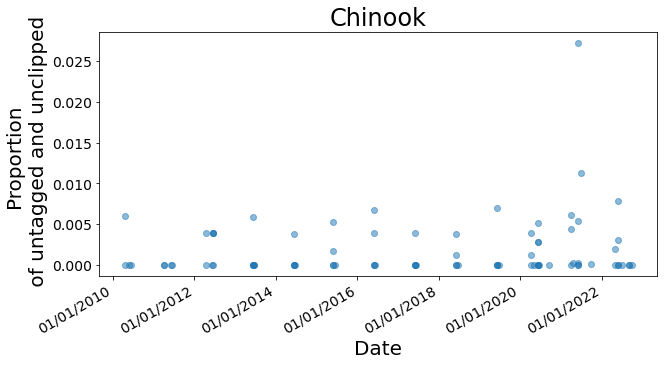

In [9]:
fig = plt.figure(figsize = (10,5))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
plt.scatter(chinook_subset_df['first_release_date'], chinook_subset_df['prop_untagged_unclipped'], alpha = 0.5)
plt.ylabel("Proportion \n of untagged and unclipped", fontsize = 20)
plt.xlabel("Date", fontsize = 20)
plt.title("Chinook", fontsize = 24)
plt.gcf().autofmt_xdate()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

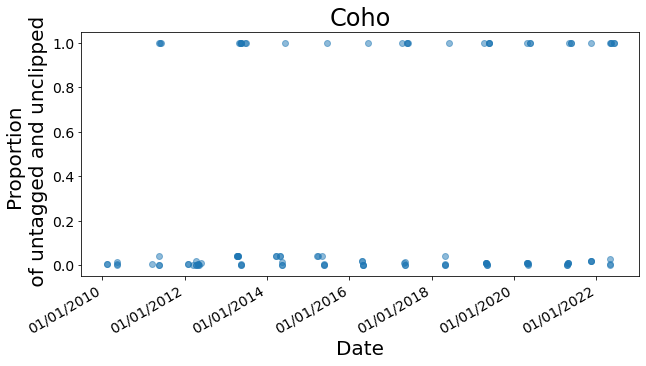

In [10]:
fig = plt.figure(figsize = (10,5))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
plt.scatter(coho_subset_df['first_release_date'], coho_subset_df['prop_untagged_unclipped'], alpha = 0.5)
plt.ylabel("Proportion \n of untagged and unclipped", fontsize = 20)
plt.xlabel("Date", fontsize = 20)
plt.title("Coho", fontsize = 24)
plt.gcf().autofmt_xdate()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


In [18]:
#reading skagit data
df_skagit = pd.read_csv(data_string + "skagit_2010-2022_w_covariates.csv")

print(df_skagit)


      Unnamed: 0  Unnamed: 0.1           date_range            Down_time  \
0              0             0  2010-01-20 12:00:00                  NaN   
1              1             1  2010-01-21 12:00:00                  NaN   
2              2             2  2010-01-22 12:00:00             08:45:00   
3              3             3  2010-01-23 12:00:00                  NaN   
4              4             4  2010-01-24 12:00:00                  NaN   
...          ...           ...                  ...                  ...   
8211         165           165           2022-07-09  1899-12-30 22:30:00   
8212         166           166           2022-07-10                  NaN   
8213         167           167           2022-07-11                  NaN   
8214         168           168           2022-07-12  1899-12-30 22:30:00   
8215         169           169           2022-07-13                  NaN   

         Up_date              Up_time             midpoint        In  \
0            Na

In [21]:
df_skagit['Date'] = pd.to_datetime(df_skagit['Date'])
df_merged = df_skagit.merge(subset_subset_coho[['first_release_date','coho_total','coho_prop_untagged_unclipped']],
                            left_on = 'Date', right_on = 'first_release_date', how = 'left')
df_merged

,Unnamed: 0,Unnamed: 0.1,date_range,Down_time,Up_date,Up_time,midpoint,In,Up,Down,...,temp_diff,photoperiod,lunar_phase,photo_diff,trap,Unnamed: 0.1.1,steelheadsmolt_hatchery_num,first_release_date,coho_total,coho_prop_untagged_unclipped
0,0,0,2010-01-20 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,9.016667,0.186283,0.033333,scoop,NaN,NaN,NaT,NaN,NaN
1,1,1,2010-01-21 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,9.066667,0.266467,0.050000,scoop,NaN,NaN,NaT,NaN,NaN
2,2,2,2010-01-22 12:00:00,08:45:00,2010-01-22,17:20:00,2010-01-22 13:02:30,8.583333,2010-01-22 17:20:00,2010-01-22 08:45:00,...,-0.1,9.100000,0.356833,0.033333,scoop,NaN,NaN,NaT,NaN,NaN
3,3,3,2010-01-23 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,9.150000,0.455035,0.050000,scoop,NaN,NaN,NaT,NaN,NaN
4,4,4,2010-01-24 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,9.183333,0.558129,0.033333,scoop,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,165,165,2022-07-09,1899-12-30 22:30:00,2022-07-09,1899-12-30 08:00:00,2022-07-09 03:15:00,9.500000,2022-07-09 08:00:00,2022-07-08 22:30:00,...,0.1,15.933333,0.704146,-0.016667,screw,189.0,NaN,NaT,NaN,NaN
8404,166,166,2022-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,15.900000,0.802999,-0.033333,screw,190.0,NaN,NaT,NaN,NaN
8405,167,167,2022-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1,15.883333,0.887916,-0.016667,screw,191.0,NaN,NaT,NaN,NaN
8406,168,168,2022-07-12,1899-12-30 22:30:00,2022-07-12,1899-12-30 08:00:00,2022-07-12 03:15:00,9.500000,2022-07-12 08:00:00,2022-07-11 22:30:00,...,0.4,15.850000,0.952059,-0.033333,screw,192.0,NaN,NaT,NaN,NaN


In [22]:
df_merged['coho1_wild_prop'] = df_merged['coho1_wild_num']/(
    df_merged['coho1_hatchery_num']+df_merged['coho1_wild_num'])

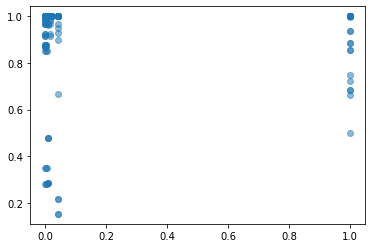

In [24]:

plt.scatter(df_merged['coho_prop_untagged_unclipped'], df_merged['coho1_wild_prop'], alpha = 0.5)

In [27]:
subset_df_2007 = df[(df['first_release_date'].dt.year == 2007)]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(subset_df_2007) 


,record_code,format_version,submission_date,reporting_agency,release_agency,coordinator,tag_code_or_release_id,tag_type,first_sequential_number,last_sequential_number,related_group_type,related_group_id,species,run,brood_year,first_release_date,last_release_date,release_location_code,hatchery_location_code,stock_location_code,release_stage,rearing_type,study_type,release_strategy,avg_weight,avg_length,study_integrity,cwt_1st_mark,cwt_1st_mark_count,cwt_2nd_mark,cwt_2nd_mark_count,non_cwt_1st_mark,non_cwt_1st_mark_count,non_cwt_2nd_mark,non_cwt_2nd_mark_count,counting_method,tag_loss_rate,tag_loss_days,tag_loss_sample_size,tag_reused,comments,release_location_name,hatchery_location_name,stock_location_name,release_location_state,release_location_rmis_region,release_location_rmis_basin,record_origin,tagged_adclipped,tagged_unclipped,untagged_adclipped,untagged_unclipped,untagged_unknown,total,unclipped,prop_unclipped,prop_untagged_unclipped
5,T,4.2,20231204,WDFW,WDFW,4,633867,12.0,NaN,NaN,NaN,NaN,1,1.0,2006,2007-06-15,2007-06-15,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,NaN,H,NaN,NaN,6.04,81.0,NaN,5000.0,254739.0,0.0,946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,254739,946,0,0,0,255685,946,0.003700,0.000000
10,T,4.2,20231204,WDFW,WDFW,4,210745,0.0,NaN,NaN,NaN,NaN,1,3.0,2006,2007-06-11,2007-06-11,3F10208 030435 R,3F10208 031421 H,3F10208 030176 S,NaN,H,NaN,NaN,4.27,73.0,NaN,5000.0,161018.0,0.0,798.0,5000.0,956.0,NaN,NaN,NaN,0.0059,NaN,NaN,NaN,BO=W(WILD),BAKER R 03.0435,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,SKAGG,N,161018,798,956,0,0,162772,798,0.004903,0.000000
37,T,4.2,20231204,WDFW,WDFW,4,210735,0.0,NaN,NaN,NaN,NaN,1,2.0,2006,2007-05-25,2007-05-25,3F10208 032363 R,3F10208 031853AH,3F10208 030176 S,NaN,H,NaN,NaN,3.54,70.0,NaN,5000.0,231662.0,NaN,NaN,5000.0,488.0,NaN,NaN,NaN,0.0021,NaN,NaN,NaN,BO=W(WILD),COUNTY LINE CR3.2363,COUNTY LINE PONDS,SKAGIT R 03.0176,WA,SKAG,UPSK,N,231662,0,488,0,0,232150,0,0.000000,0.000000
39,T,4.2,20231204,WDFW,WDFW,4,633572,13.0,NaN,NaN,D,4.200700e+12,2,NaN,2005,2007-06-01,2007-06-04,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,Y,H,NaN,NaN,28.52,139.0,NaN,0.0,43575.0,NaN,NaN,0.0,175.0,NaN,NaN,NaN,0.0040,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,0,43575,0,175,0,43750,43750,1.000000,0.004000
59,N,4.2,20231204,WDFW,WDFW,4,!04P00047428,NaN,NaN,NaN,NaN,NaN,2,NaN,2005,2007-06-01,2007-06-04,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,Y,H,NaN,NaN,28.52,139.0,NaN,NaN,NaN,NaN,NaN,5000.0,170897.0,0.0,1451.0,NaN,NaN,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,0,0,170897,1451,0,172348,1451,0.008419,0.008419
120,N,4.2,20231204,WDFW,WDFW,4,!04P00051177,NaN,NaN,NaN,NaN,NaN,2,NaN,2005,2007-02-05,2007-02-07,3F10107 030102 R,3F10208 031421 H,3F10208 030176 S,Y,H,NaN,NaN,18.14,112.0,NaN,NaN,NaN,NaN,NaN,5000.0,99158.0,0.0,842.0,NaN,NaN,NaN,NaN,NaN,NaN,INDIAN SLOUGH 3.0102,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,LOSK,N,0,0,99158,842,0,100000,842,0.008420,0.008420
129,N,4.2,20231204,WDFW,WDFW,4,!04P00033591,16.0,NaN,NaN,NaN,NaN,1,1.0,2005,2007-04-05,2007-04-05,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,Y,H,NaN,NaN,37.79,143.0,NaN,NaN,NaN,NaN,NaN,5000.0,126446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,0,0,126446,0,0,126446,0,0.000000,0.000000
180,T,4.2,20231204,WDFW,WDFW,4,633176,12.0,NaN,NaN,O,4.200700e+12,1,1.0,2005,2007-04-05,2007-04-05,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,Y,H,P,NaN,37.79,143.0,NaN,5000.0,74633.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO QC,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,T,74633,0,0,0,0,74633,0,0.000000,0.000000
254,T,4.2,20231204,WDFW,WDFW,4,633480,12.0,NaN,NaN,O,4.200700e+12,1,1.0,2005,2007-04-04,2007-04-05,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,Y,H,P,NaN,37.79,143.0,NaN,0.

In [28]:
#trying new file - https://www.rmis.org/reports/CSV4392.txt

df2 = pd.read_csv("https://www.rmis.org/reports/CSV4392.txt")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df2)   

,record_code,format_version,submission_date,reporting_agency,release_agency,coordinator,tag_code_or_release_id,tag_type,first_sequential_number,last_sequential_number,related_group_type,related_group_id,species,run,brood_year,first_release_date,last_release_date,release_location_code,hatchery_location_code,stock_location_code,release_stage,rearing_type,study_type,release_strategy,avg_weight,avg_length,study_integrity,cwt_1st_mark,cwt_1st_mark_count,cwt_2nd_mark,cwt_2nd_mark_count,non_cwt_1st_mark,non_cwt_1st_mark_count,non_cwt_2nd_mark,non_cwt_2nd_mark_count,counting_method,tag_loss_rate,tag_loss_days,tag_loss_sample_size,tag_reused,comments,release_location_name,hatchery_location_name,stock_location_name,release_location_state,release_location_rmis_region,release_location_rmis_basin,record_origin,tagged_adclipped,tagged_unclipped,untagged_adclipped,untagged_unclipped,untagged_unknown
0,N,4.2,20231204,WDFW,WDFW,4,!04P00111602,NaN,NaN,NaN,NaN,NaN,1,1.0,2016,20170602,20170602,3F10208 031411 R,3F10208 031421 H,3F10208 031421 S02,NaN,H,NaN,VO,6.21,84445.0,NaN,NaN,NaN,NaN,NaN,5000.0,105786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,MARBLEMOUNT HATCH,WA,SKAG,UPSK,N,0,0,105786,0,0
1,T,4.2,20231204,WDFW,WDFW,4,631017,0.0,NaN,NaN,D,4.200000e+12,1,1.0,1998,20000306,20000313,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,Y,H,NaN,NaN,41.23,151.0,NaN,5000.0,65619.0,NaN,NaN,5000.0,1476.0,NaN,NaN,NaN,0.0220,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,65619,0,1476,0,0
2,T,4.2,20231204,WDFW,WDFW,4,630950,11.0,NaN,NaN,D,4.200200e+12,2,NaN,2000,20020516,20020517,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,Y,H,NaN,NaN,26.91,128.0,NaN,5000.0,10582.0,0.0,63.0,5000.0,260.0,0.0,2.0,NaN,0.0240,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,10582,63,260,2,0
3,T,4.2,20231204,WDFW,WDFW,4,638543,12.0,NaN,NaN,NaN,NaN,1,1.0,2022,20230825,20230825,3F10208 031411 R,3F10208 031421 H,3F10208 031421 S02,NaN,H,P,FR,6.12,89.0,NaN,5000.0,99251.0,0.0,388.0,5000.0,1747.0,0.0,7.0,NaN,0.0173,NaN,519.0,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,MARBLEMOUNT HATCH,WA,SKAG,UPSK,N,99251,388,1747,7,0
4,T,4.2,20231204,WDFW,WDFW,4,210745,0.0,NaN,NaN,NaN,NaN,1,3.0,2006,20070611,20070611,3F10208 030435 R,3F10208 031421 H,3F10208 030176 S,NaN,H,NaN,NaN,4.27,73.0,NaN,5000.0,161018.0,0.0,798.0,5000.0,956.0,NaN,NaN,NaN,0.0059,NaN,NaN,NaN,BO=W(WILD),BAKER R 03.0435,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,SKAGG,N,161018,798,956,0,0
5,T,4.2,20231204,WDFW,WDFW,4,210677,0.0,NaN,NaN,NaN,NaN,1,2.0,2005,20060523,20060523,3F10208 030176 R,3F10208 031853AH,3F10208 030176 S,NaN,H,NaN,NaN,3.38,66.0,NaN,5000.0,200657.0,0.0,1641.0,5000.0,2872.0,NaN,NaN,NaN,0.0140,NaN,NaN,NaN,BO=W(WILD),SKAGIT R 03.0176,COUNTY LINE PONDS,SKAGIT R 03.0176,WA,SKAG,SKAGG,N,200657,1641,2872,0,0
6,T,4.2,20231204,WDFW,WDFW,4,633867,12.0,NaN,NaN,NaN,NaN,1,1.0,2006,20070615,20070615,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,NaN,H,NaN,NaN,6.04,81.0,NaN,5000.0,254739.0,0.0,946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,254739,946,0,0,0
7,T,4.2,20231204,WDFW,WDFW,4,632065,13.0,NaN,NaN,D,4.200400e+12,2,NaN,2002,20040601,20040607,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,Y,H,NaN,NaN,25.62,135.0,NaN,5000.0,29560.0,0.0,1040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20% LOSS FROM FLOOD,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,29560,1040,0,0,0
8,T,4.2,20231204,WDFW,WDFW,4,211007,0.0,NaN,NaN,NaN,NaN,1,2.0,2011,20120608,20120612,3F10208 031853BR,3F10208 031421 H,3F10208 030176 S,NaN,H,NaN,VO,4.27,69.0,NaN,5000.0,187388.0,0.0,1908.0,5000.0,1527.0,NaN,NaN,NaN,0.0080,NaN,500.0,NaN,BO=MIXED(HxW) FISH MOVED TO CO.LINE POND 6/5/1...,CO LINE PD2 03.1853B,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,187388,1908,1527,0,0
9,T,4.2,20231204,WDFW,WDFW,4,638010,12.0,NaN,NaN,NaN,NaN,1,1.0,2020,20

In [29]:
df2.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/skagit/rmis.csv")